<a href="https://colab.research.google.com/github/Foco22/Machine-Learning-and-Big-Data-UC/blob/master/Visualizacion%20de%20informacion%20en%20Big%20Data/Miniproyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Ejercicio 1**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving videoconferencia.csv to videoconferencia.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['videoconferencia.csv']))

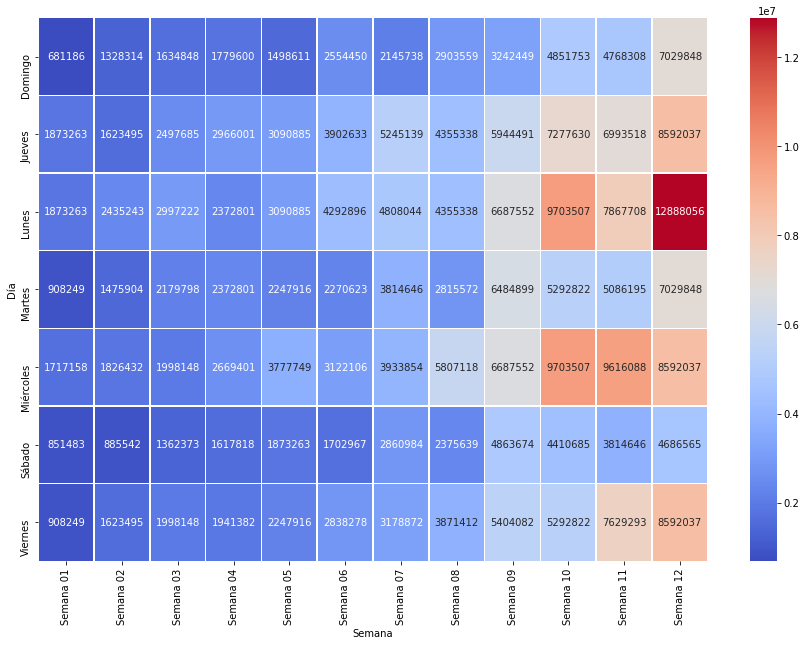

In [6]:
df = df.pivot(index = 'Día', columns ='Semana', values = 'Horas')

plt.figure(figsize=(15,10))

ax = sns.heatmap(df, annot=True, fmt="d", annot_kws={'size':10}, cmap='coolwarm', linewidths=.5)

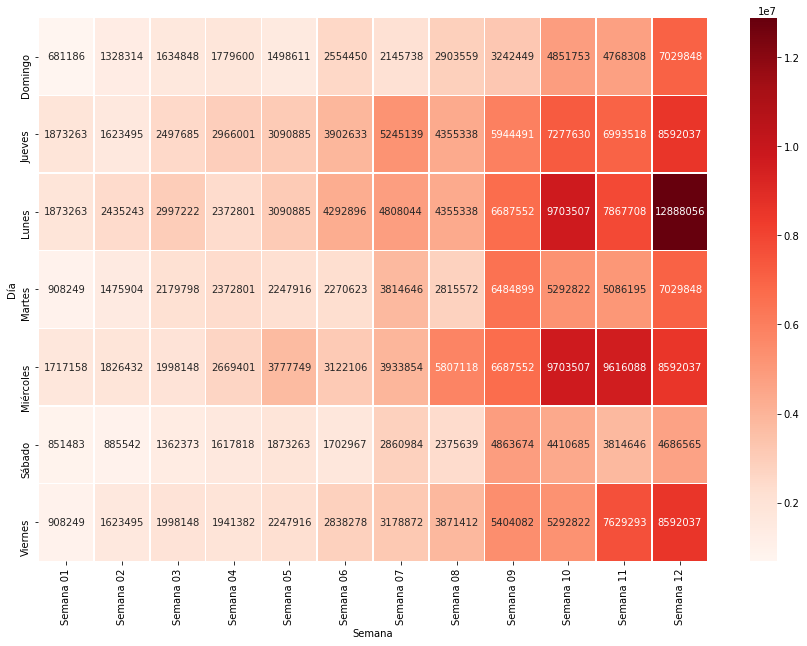

In [8]:
plt.figure(figsize=(15,10))

ax = sns.heatmap(df, annot=True, fmt="d", annot_kws={'size':10}, cmap='Reds', linewidths=.5)

plt.show()

***¿cuál paleta es más efectiva para codificar estos datos?***

La paleta mas efectiva para visualizar los datos es la paleta con el parametro cmap igual 'Reds' (paleta secuenciales), ya que con una tonalidad, te muestra como ha ido incrementando el uso de aplicacion a lo largo de las semana. Junto con esto, se puede revisar que los dias miercoles y lunes son los dias mas intensos en el uso de la app, ya que sus celdas son muchos mas rojos que los demas dias.

Las paletas secuenciales son una buena forma de visualizar los datos cuando se los datos parten desde el 0 ( no valores negativos), ya que permiten ver el incremento de los datos en base a la intensidad del color.

**Ejercicio 2**

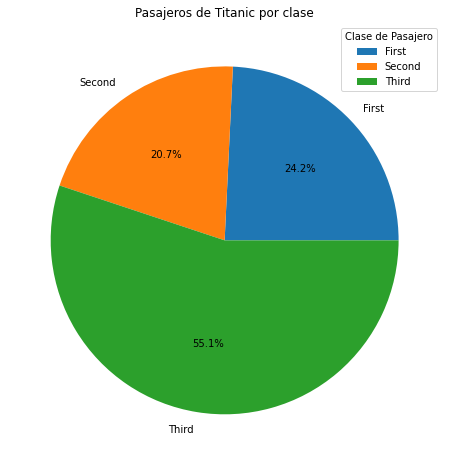

In [10]:
df_titanic = sns.load_dataset("titanic")

df = df_titanic.groupby('class').count()['survived']
df = df.reset_index()

fig = plt.figure(figsize=(8, 8))

plot = fig.add_subplot()

pie_plot = plot.pie(df["survived"], labels = df["class"], autopct='%1.1f%%')

plot.legend(pie_plot[0], df["class"], title="Clase de Pasajero")

plot.set_title("Pasajeros de Titanic por clase")

plt.show()

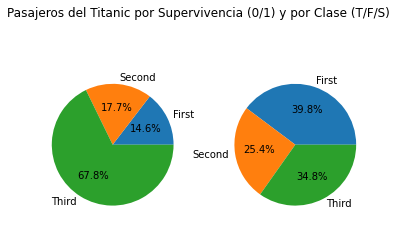

In [11]:
df1 = df_titanic.groupby(['class','survived']).count()['pclass']
df1 = df1.reset_index()

df1_0 = df1.loc[df1['survived'] == 0]
df1_1 = df1.loc[df1['survived'] == 1]

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)

ax1.pie(df1_0['pclass'], labels = df1_0['class'], autopct='%1.1f%%')

ax2.pie(df1_1['pclass'], labels = df1_1['class'], autopct='%1.1f%%')

fig.suptitle('Pasajeros del Titanic por Supervivencia (0/1) y por Clase (T/F/S)')

plt.show()

***¿Cual es la clase de pasajeros mas comun para supervivientes? ***
(1). First Class

***¿Cual es la clase de pasajeros mas comun para no supervivientes?*** 
(0). Third Class

***¿Cree que este gráfico es más efectivo que un gráfico de barras para comparar categorías?***

Si, creo que es mas efectivo ya que uno puede visualizar inmediatamente cual clase es la mas comun, segun la cantidad de espacio del circulo, junto con los porcentaje destacados en sus etiquetas. Me parece que es una buena forma de saber cual categoria se repite mas en el dataset.

**Ejercicio 3**

In [12]:
from google.colab import files
uploaded = files.upload()

Saving peliculas.csv to peliculas.csv


In [15]:
import io
df = pd.read_csv(io.BytesIO(uploaded['peliculas.csv']))

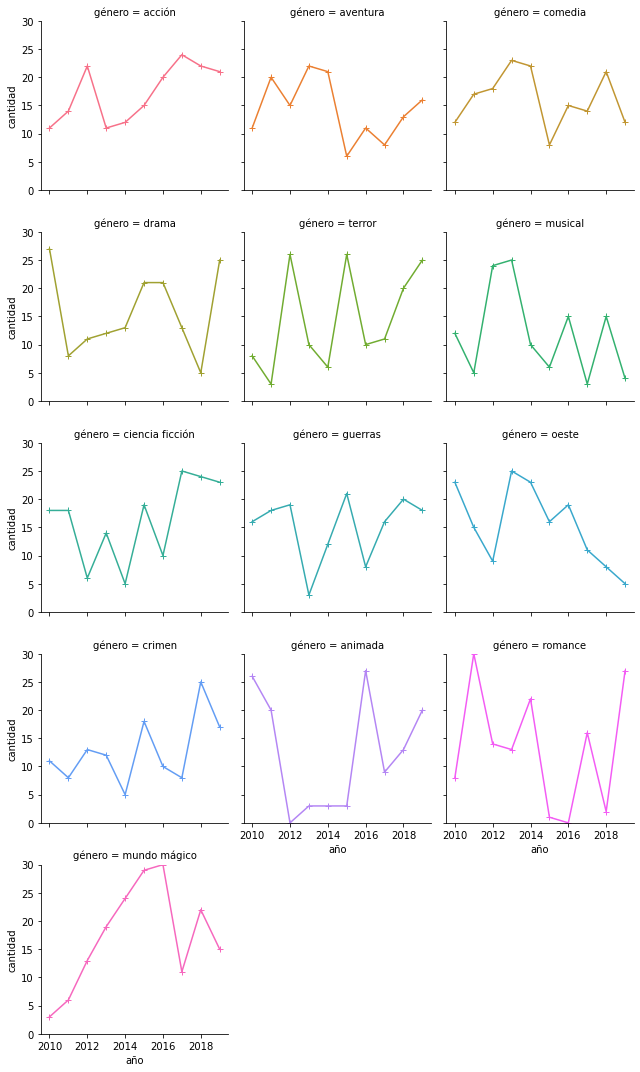

In [16]:
grid = sns.FacetGrid(data=df, col= 'género', hue="género", col_wrap=3)

grip = (grid.map(plt.plot, "año", "cantidad", marker="+").set(ylim=(0, 30)))

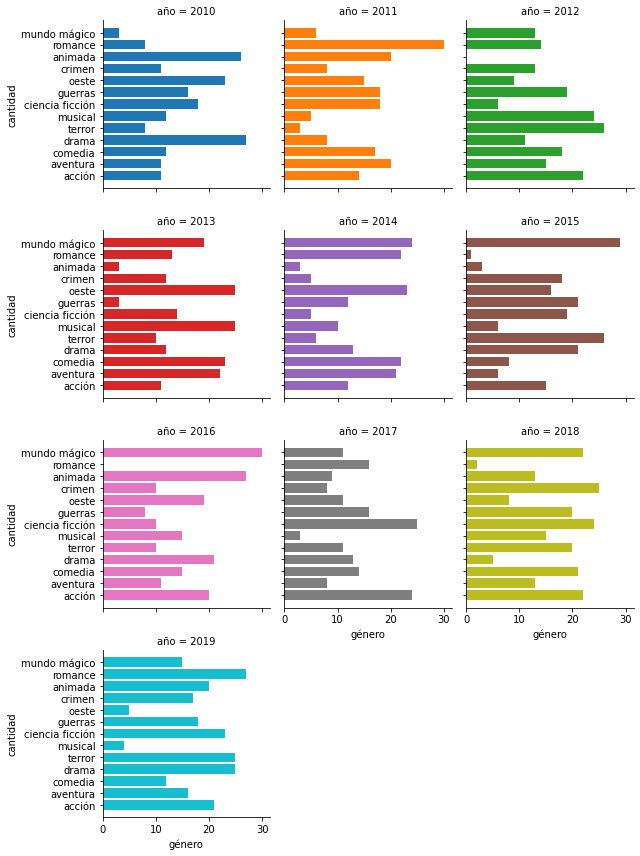

In [17]:
grid = sns.FacetGrid(data=df, col= 'año', hue="año", col_wrap=3,sharey=True,aspect=1)

grid.map(plt.barh,'género', "cantidad")

plt.show()

***¿cuál de los dos gráficos permite comparar la tendencia de un género entre los diferentes años?***

El primer grafico te permite comparar la tendencia de un genero a traves de los años, ya que cada genero tienen un grafico especifico, donde uno puede ver la cantidad de peliculas estrenadas a lo largo del tiempo.

***¿cual de los dos gráficos permite identificar el género de películas más estrenados en 1 año específico?***

El segundo grafico permite saber cual fue el genero que mas estreno peliculas en un particular año. Por ejemplo, en el 2019, se puede ver que el genero romance fue el que mas estreno peliculas, con alrededor de 27 peliculas estrenadas.